Mariam Seshan sqliteHW 9/15

In [1]:
import sqlite3

connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()
print("Database connected and cursor created")


Database connected and cursor created


In [2]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("Students table created")


Students table created


In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY(student_id) REFERENCES students(student_id)
)
''')

print("Grades table created")

connection.commit()


Grades table created


In [48]:
cursor.executemany('''
INSERT INTO students (first_name, last_name)
VALUES (?, ?)
''', [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
])
students_df['full_name'] = students_df['first_name'] + " " + students_df['last_name']
students_df.head()

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade)
VALUES (?, ?, ?)
''', [
    # Alice (student_id = 1)
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),

    # Bob (student_id = 2)
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),

    # Carol (student_id = 3)
    (3, 'Math', 91),
    (3, 'English', 89),
    (3, 'History', 92),

    # Grades for David (student_id = 4)
    (4, 'Math', 78),
    (4, 'English', 81),
    (4, 'History', 74),

    # (student_id = 5)
    (5, 'Math', 88),
    (5, 'English', 92),
    (5, 'History', 87)
])

connection.commit()


In [49]:
#1. Retrieve all students' names and their grades.
cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id;
''')

results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'English', 89)
('Carol', 'White', 'History', 92)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 81)
('David', 'Brown', 'History', 74)
('Eve', 'Davis', 'Math', 88)
('Eve', 'Davis', 'English', 92)
('Eve', 'Davis', 'History', 87)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'English', 89)
('Carol', 'White', 'History', 92)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 81)
('David', 'Brown', 'History', 74)
('Eve', 'Davis', 'Math', 88)
('Eve', 'Davis', 'English', 92)
('Eve', 'Davis', 'History', 87)
('Alice', 'Johnson', '

In [50]:
#2. Find the average grade for each student.
cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id;
''')

results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 90.66666666666667)
('David', 'Brown', 77.66666666666667)
('Eve', 'Davis', 89.0)


In [51]:
#3. Find the student with the highest average grade.
cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ORDER BY average_grade DESC
    LIMIT 1;
''')

result = cursor.fetchone()
print(result)


('Alice', 'Johnson', 91.0)


In [52]:
#4. Find the average grade for the Math subject.
cursor.execute('''
    SELECT AVG(grades.grade) AS average_math_grade
    FROM grades
    WHERE grades.subject = 'Math';
''')


result = cursor.fetchone()
print(result)

(86.8,)


In [53]:
#5. List all students who scored above 90 in any subject

cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    WHERE grades.grade > 90;
''')


results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'History', 92)
('Eve', 'Davis', 'English', 92)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'History', 92)
('Eve', 'Davis', 'English', 92)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'History', 92)
('Eve', 'Davis', 'English', 92)


In [54]:

import pandas as pd
#1. Use Pandas to load the data from the students and grades tables into DataFrames.

students_df = pd.read_sql_query("SELECT * FROM students", connection)


grades_df = pd.read_sql_query("SELECT * FROM grades", connection)

print("Students DataFrame:")
print(students_df)

print("\nGrades DataFrame:")
print(grades_df)

Students DataFrame:
    student_id first_name last_name
0            1      Alice   Johnson
1            2        Bob     Smith
2            3      Carol     White
3            4      David     Brown
4            5        Eve     Davis
5            6      Alice   Johnson
6            7        Bob     Smith
7            8      Carol     White
8            9      David     Brown
9           10        Eve     Davis
10          11      Alice   Johnson
11          12        Bob     Smith
12          13      Carol     White
13          14      David     Brown
14          15        Eve     Davis

Grades DataFrame:
    grade_id  student_id  subject  grade
0          1           1     Math     95
1          2           1  English     88
2          3           1  History     90
3          4           2     Math     82
4          5           2  English     76
5          6           2  History     85
6          7           3     Math     91
7          8           3  English     89
8          9    

In [55]:
#2. Use JOIN queries to combine the data from both tables into a single DataFrame that includes each student's name, subject, and grade.

combined_df = pd.read_sql_query('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''', connection)

print("\nCombined DataFrame:")
print(combined_df)


Combined DataFrame:
   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     91
7       Carol     White  English     89
8       Carol     White  History     92
9       David     Brown     Math     78
10      David     Brown  English     81
11      David     Brown  History     74
12        Eve     Davis     Math     88
13        Eve     Davis  English     92
14        Eve     Davis  History     87
15      Alice   Johnson     Math     95
16      Alice   Johnson  English     88
17      Alice   Johnson  History     90
18        Bob     Smith     Math     82
19        Bob     Smith  English     76
20        Bob     Smith  History     85
21      Carol     White     Math     91
22      Carol     White  English     89
23      Carol     W

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Alice Johnson'),
  Text(1, 0, 'Bob Smith'),
  Text(2, 0, 'Carol White'),
  Text(3, 0, 'David Brown'),
  Text(4, 0, 'Eve Davis')])

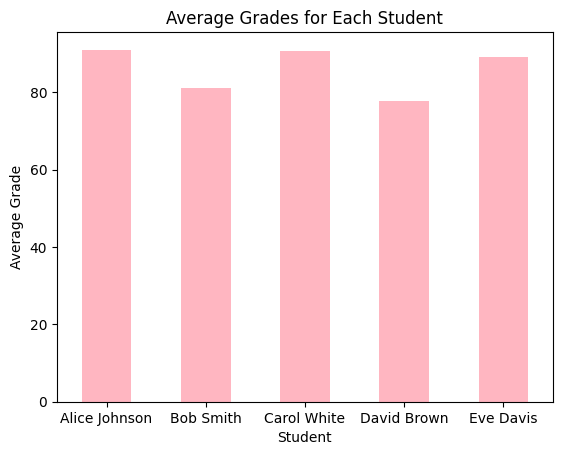

In [56]:
#3. Visualize the data with Matplotlib
#Part 1: Average grades for each student
import matplotlib.pyplot as plt

combined_df['full_name'] = combined_df['first_name'] + ' ' + combined_df['last_name']
average_grades = combined_df.groupby('full_name')['grade'].mean()

average_grades.plot(kind='bar', color='lightpink')

plt.title('Average Grades for Each Student')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.xticks(rotation= 0)


(array([0, 1, 2]),
 [Text(0, 0, 'English'), Text(1, 0, 'History'), Text(2, 0, 'Math')])

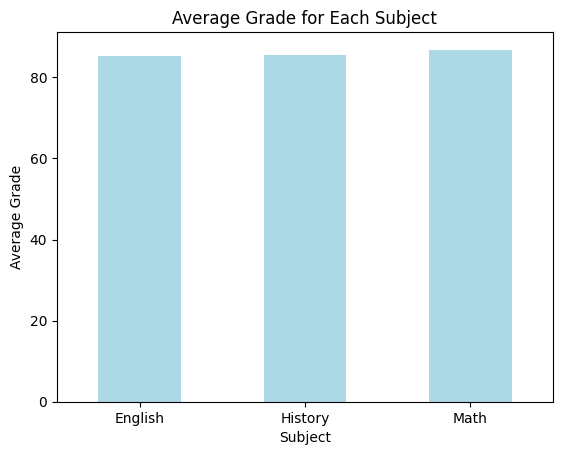

In [57]:
#Part 2: Create a bar chart showing the average grade for each subject

average_grades_by_subject = combined_df.groupby('subject')['grade'].mean()

average_grades_by_subject.plot(kind='bar', color='lightblue')

plt.title('Average Grade for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)


In [58]:
#Bonus task
#Part 1: Implement a query that finds the student with the highest grade in each subject.

import pandas as pd

highest_grade_df = pd.read_sql_query('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    WHERE (grades.subject, grades.grade) IN (
        SELECT subject, MAX(grade)
        FROM grades
        GROUP BY subject
    );
''', connection)

print(highest_grade_df)


  first_name last_name  subject  grade
0      Alice   Johnson     Math     95
1      Carol     White  History     92
2        Eve     Davis  English     92
3      Alice   Johnson     Math     95
4      Carol     White  History     92
5        Eve     Davis  English     92
6      Alice   Johnson     Math     95
7      Carol     White  History     92
8        Eve     Davis  English     92


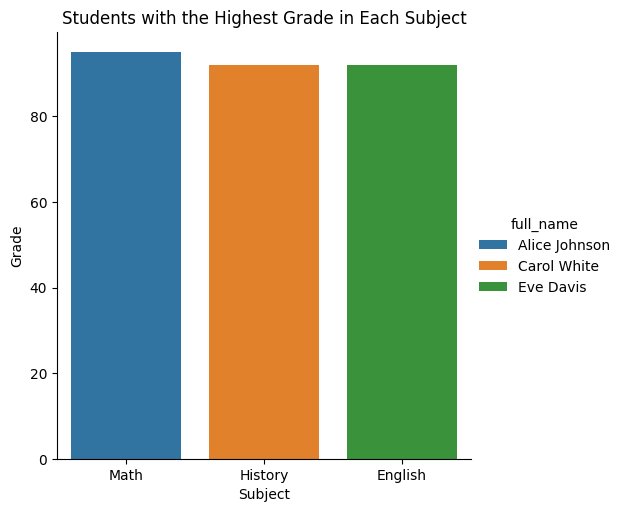

In [59]:
#Part 2: Visualize the results using a grouped bar chart.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

highest_grade_df = pd.read_sql_query('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    WHERE grades.grade = (
        SELECT MAX(g.grade)
        FROM grades g
        WHERE g.subject = grades.subject
    );
''', connection)

highest_grade_df['full_name'] = highest_grade_df['first_name'] + ' ' + highest_grade_df['last_name']


sns.catplot(
    data=highest_grade_df,
    kind="bar",
    x="subject",
    y="grade",
    hue="full_name",
    legend=True,
).set(
    title="Students with the Highest Grade in Each Subject",
    xlabel="Subject",
    ylabel="Grade"
)


plt.show()